In [19]:
## Importing everything together to save time

import pandas as pd 
import numpy as np
import matplotlib as mp
import seaborn as sns
import math
import matplotlib.pyplot as plt
from datetime import date
%matplotlib inline
## %matplotlib notebook

Patients = pd.read_excel("HospitalDatabase.xlsx","Patients")
EDVisits = pd.read_excel("HospitalDatabase.xlsx","EDVisits")
AmbulatoryVisits = pd.read_excel("HospitalDatabase.xlsx","AmbulatoryVisits")
ReAdmissionRegistry = pd.read_excel("HospitalDatabase.xlsx","ReAdmissionRegistry")
Discharges = pd.read_excel("HospitalDatabase.xlsx","Discharges")
Providers = pd.read_excel("HospitalDatabase.xlsx","Providers")
EDUnique = pd.read_excel("HospitalDatabase.xlsx","EDUnique")
Merged = pd.merge(Patients, Discharges, on="PatientID")
Merged1= pd.merge(Patients, ReAdmissionRegistry, on="PatientID", how="left")

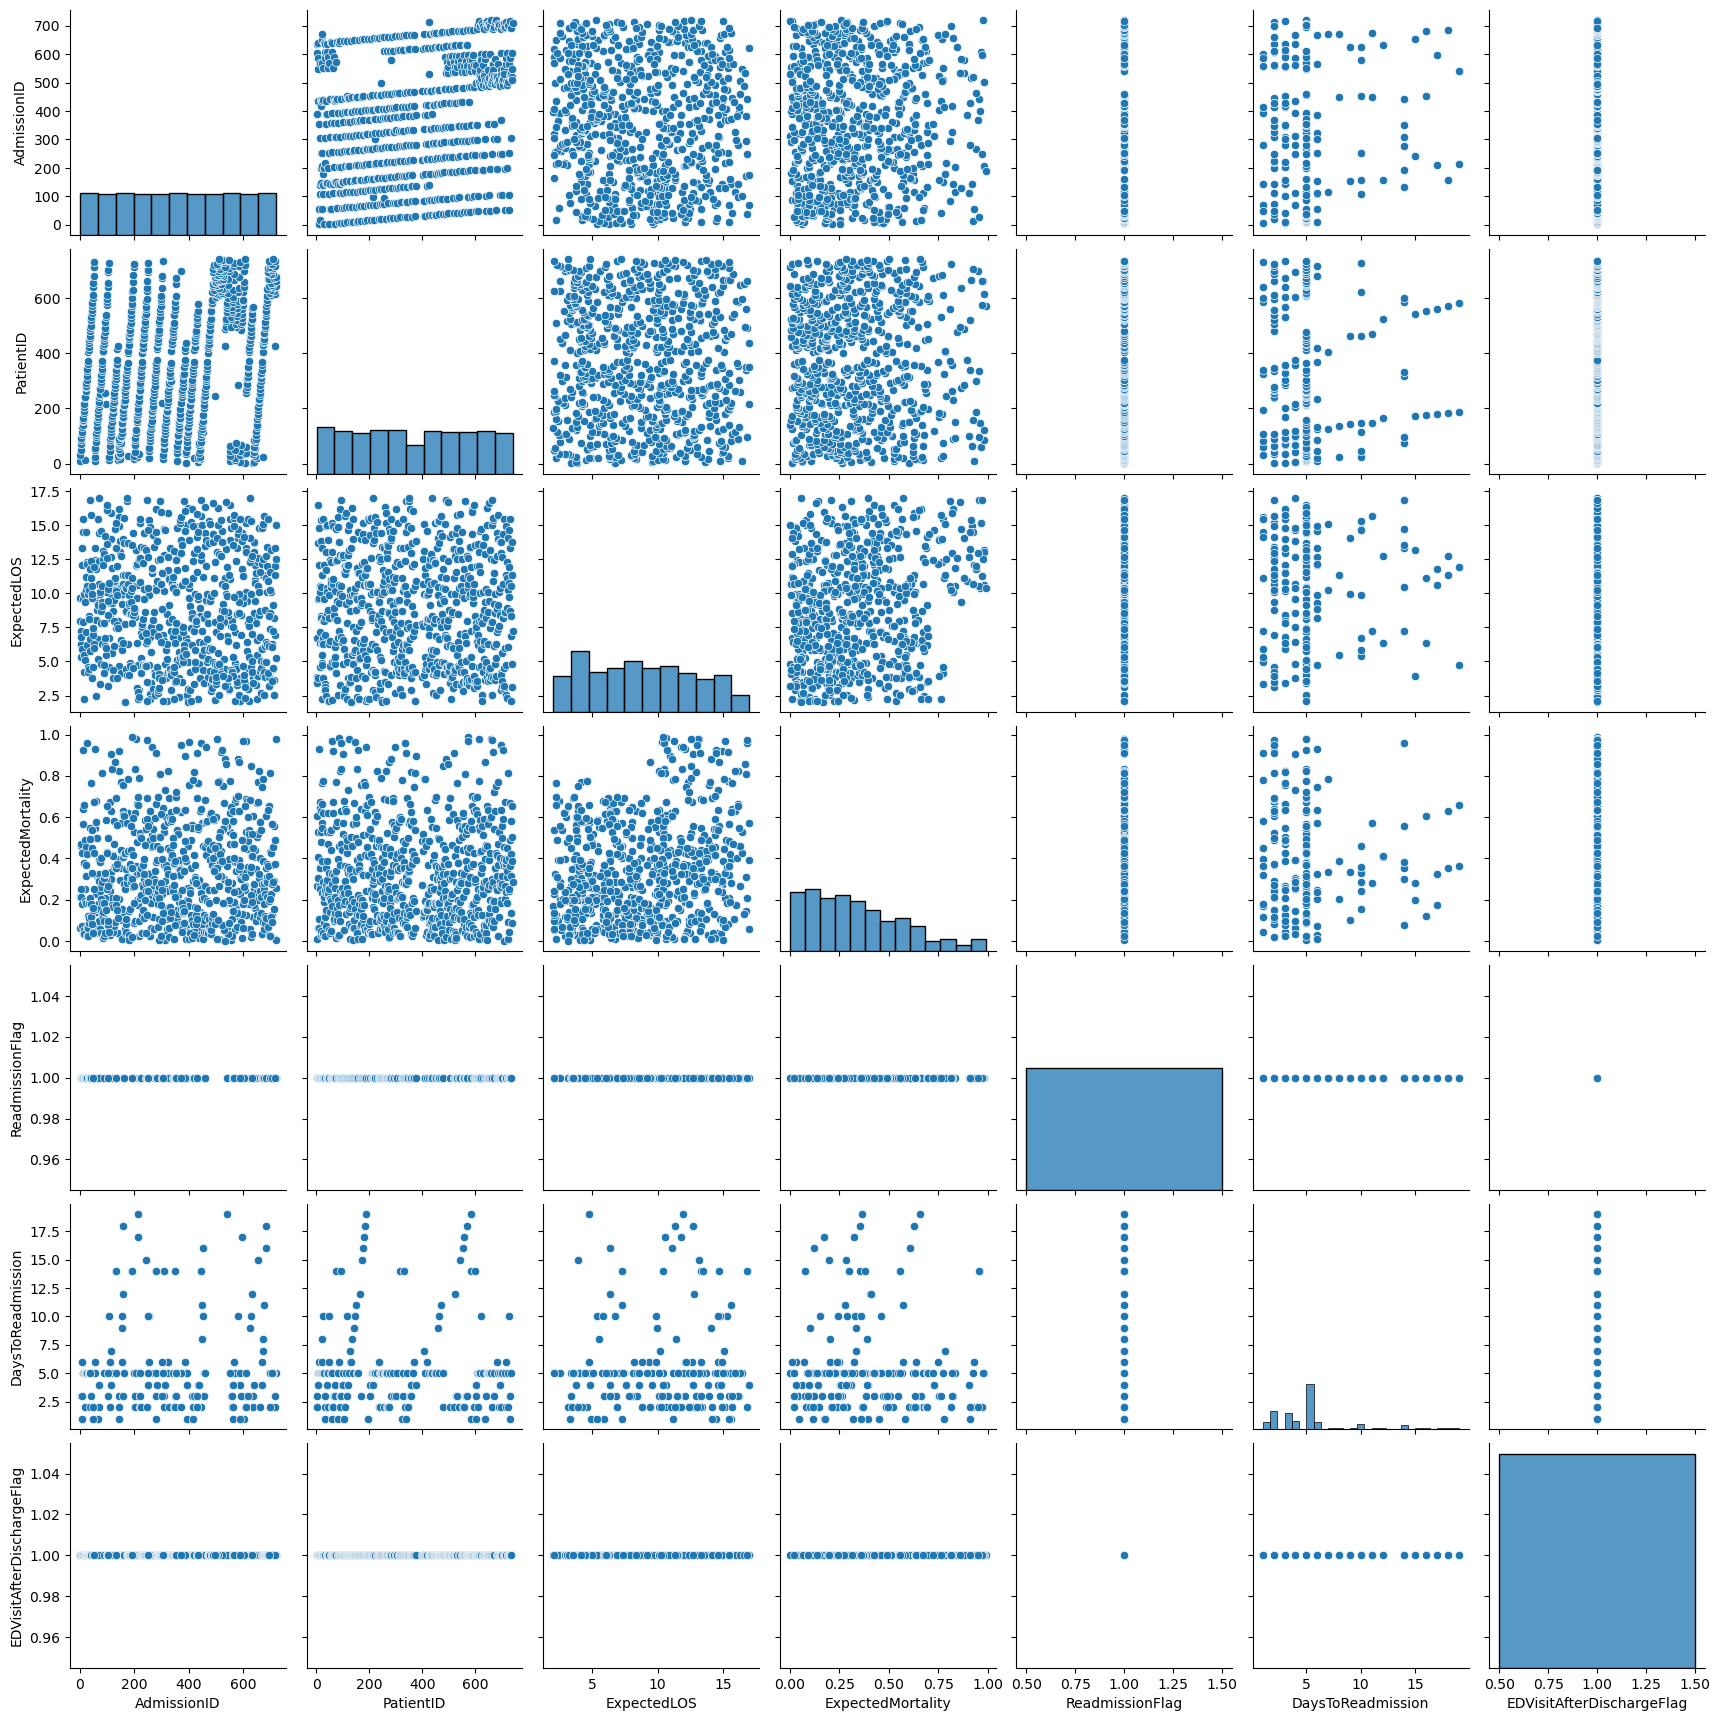

In [37]:
## Q1. Make a pair plot on Readmission Registry table 
## & do u see any correlation between columns values.

#Answer

#Linking the dataframe
ReAdmissionRegistry = pd.read_excel("HospitalDatabase.xlsx","ReAdmissionRegistry")

#Making a pairplot for the Readmission Regitry Table - displays scatter plot and histograms 
#between 2 columns having numeric values
sns.pairplot(ReAdmissionRegistry)

In [38]:
## Q1 - Continued
## Finding out the correaltion between the columns with numeric values   
# Linking the dataframe
df = pd.read_excel("HospitalDatabase.xlsx","ReAdmissionRegistry")

#Defining the columns where correlation coefficient
col1, col2 = "ExpectedLOS", "ExpectedMortality"
corr = df[col1].corr(df[col2])
print ("Correlation between ExpectedLOS and ExpectedMortality is", round(corr, 2))

col1, col2 = "AdmissionID", "ExpectedMortality"
corr = df[col1].corr(df[col2])
print ("Correlation between AdmissionID and ExpectedMortality is", round(corr, 2))

col1, col2 = "PatientID", "ExpectedMortality"
corr = df[col1].corr(df[col2])
print ("Correlation between PatientID and ExpectedMortality is", round(corr, 2))

col1, col2 = "AdmissionID", "ExpectedLOS"
corr = df[col1].corr(df[col2])
print ("Correlation between AdmissionID and ExpectedLOS is", round(corr, 2))

col1, col2 = "PatientID", "ExpectedLOS"
corr = df[col1].corr(df[col2])
print ("Correlation between AdmissionID and ExpectedMortality is", round(corr, 2))

# No correlation was found except for Expected LOS and Expected Mortality where the correlation was positive but weak

Correlation between ExpectedLOS and ExpectedMortality is 0.22
Correlation between AdmissionID and ExpectedMortality is 0.03
Correlation between PatientID and ExpectedMortality is 0.01
Correlation between AdmissionID and ExpectedLOS is -0.07
Correlation between AdmissionID and ExpectedMortality is -0.02


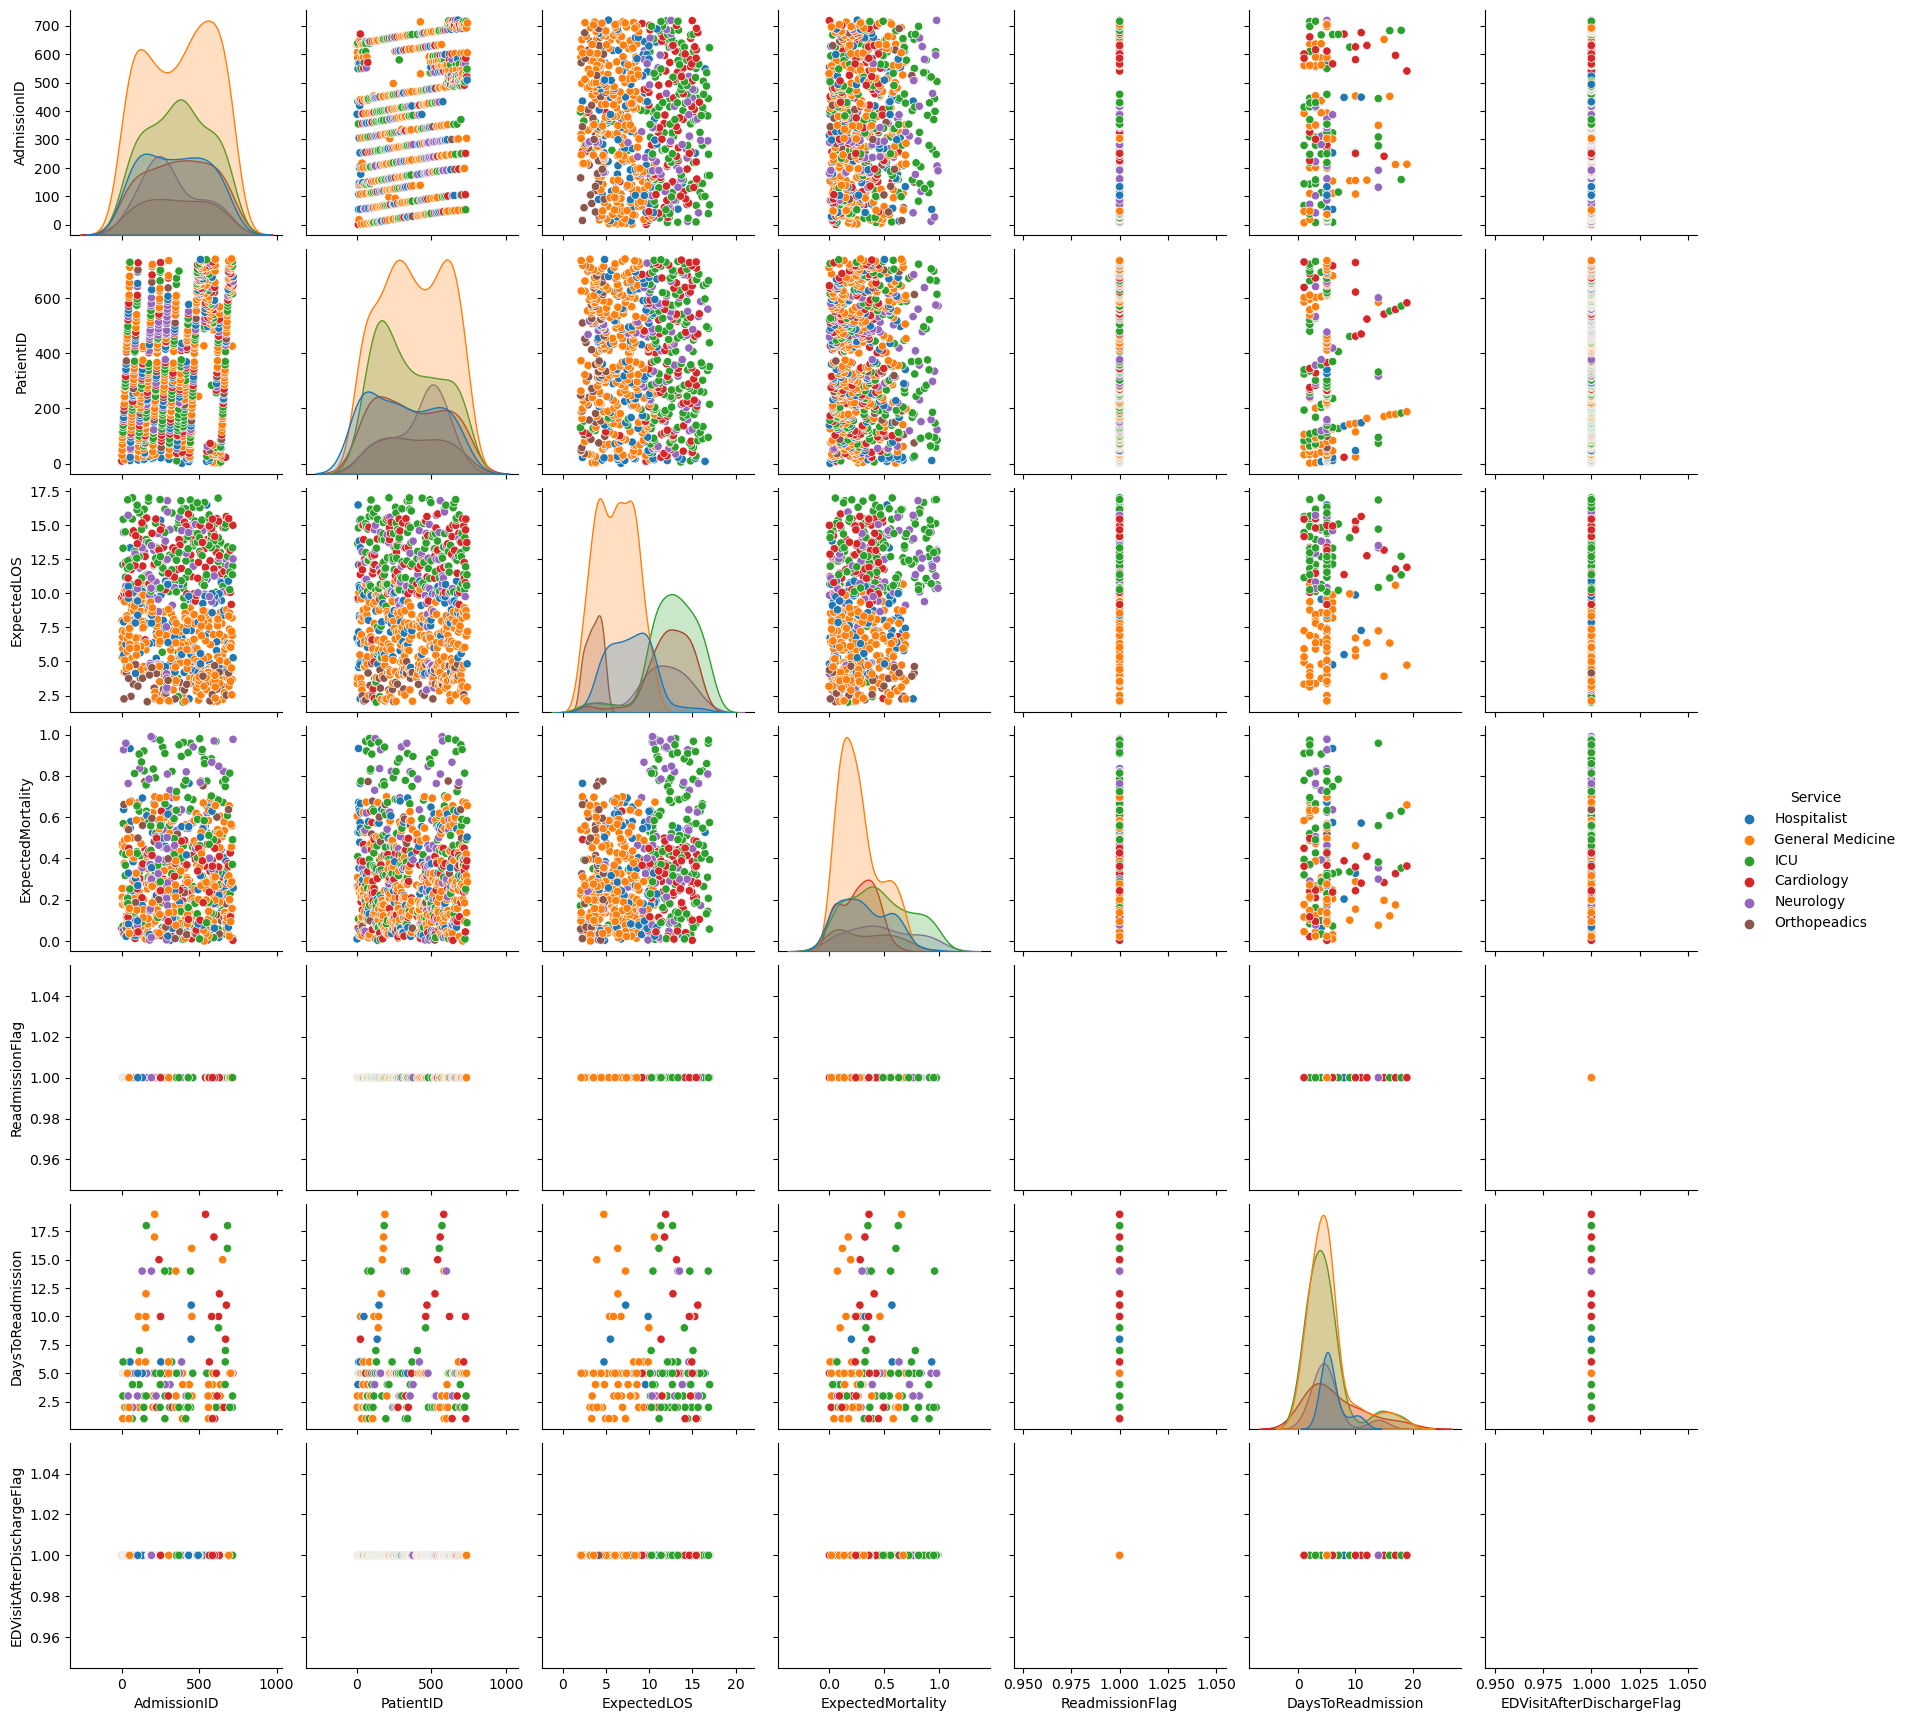

In [35]:
## Q1 - Continued
# Making a pairplot for the Readmission Regitry Table with Service categories in colors
df = pd.read_excel("HospitalDatabase.xlsx","ReAdmissionRegistry")
sns.pairplot(df, hue='Service')

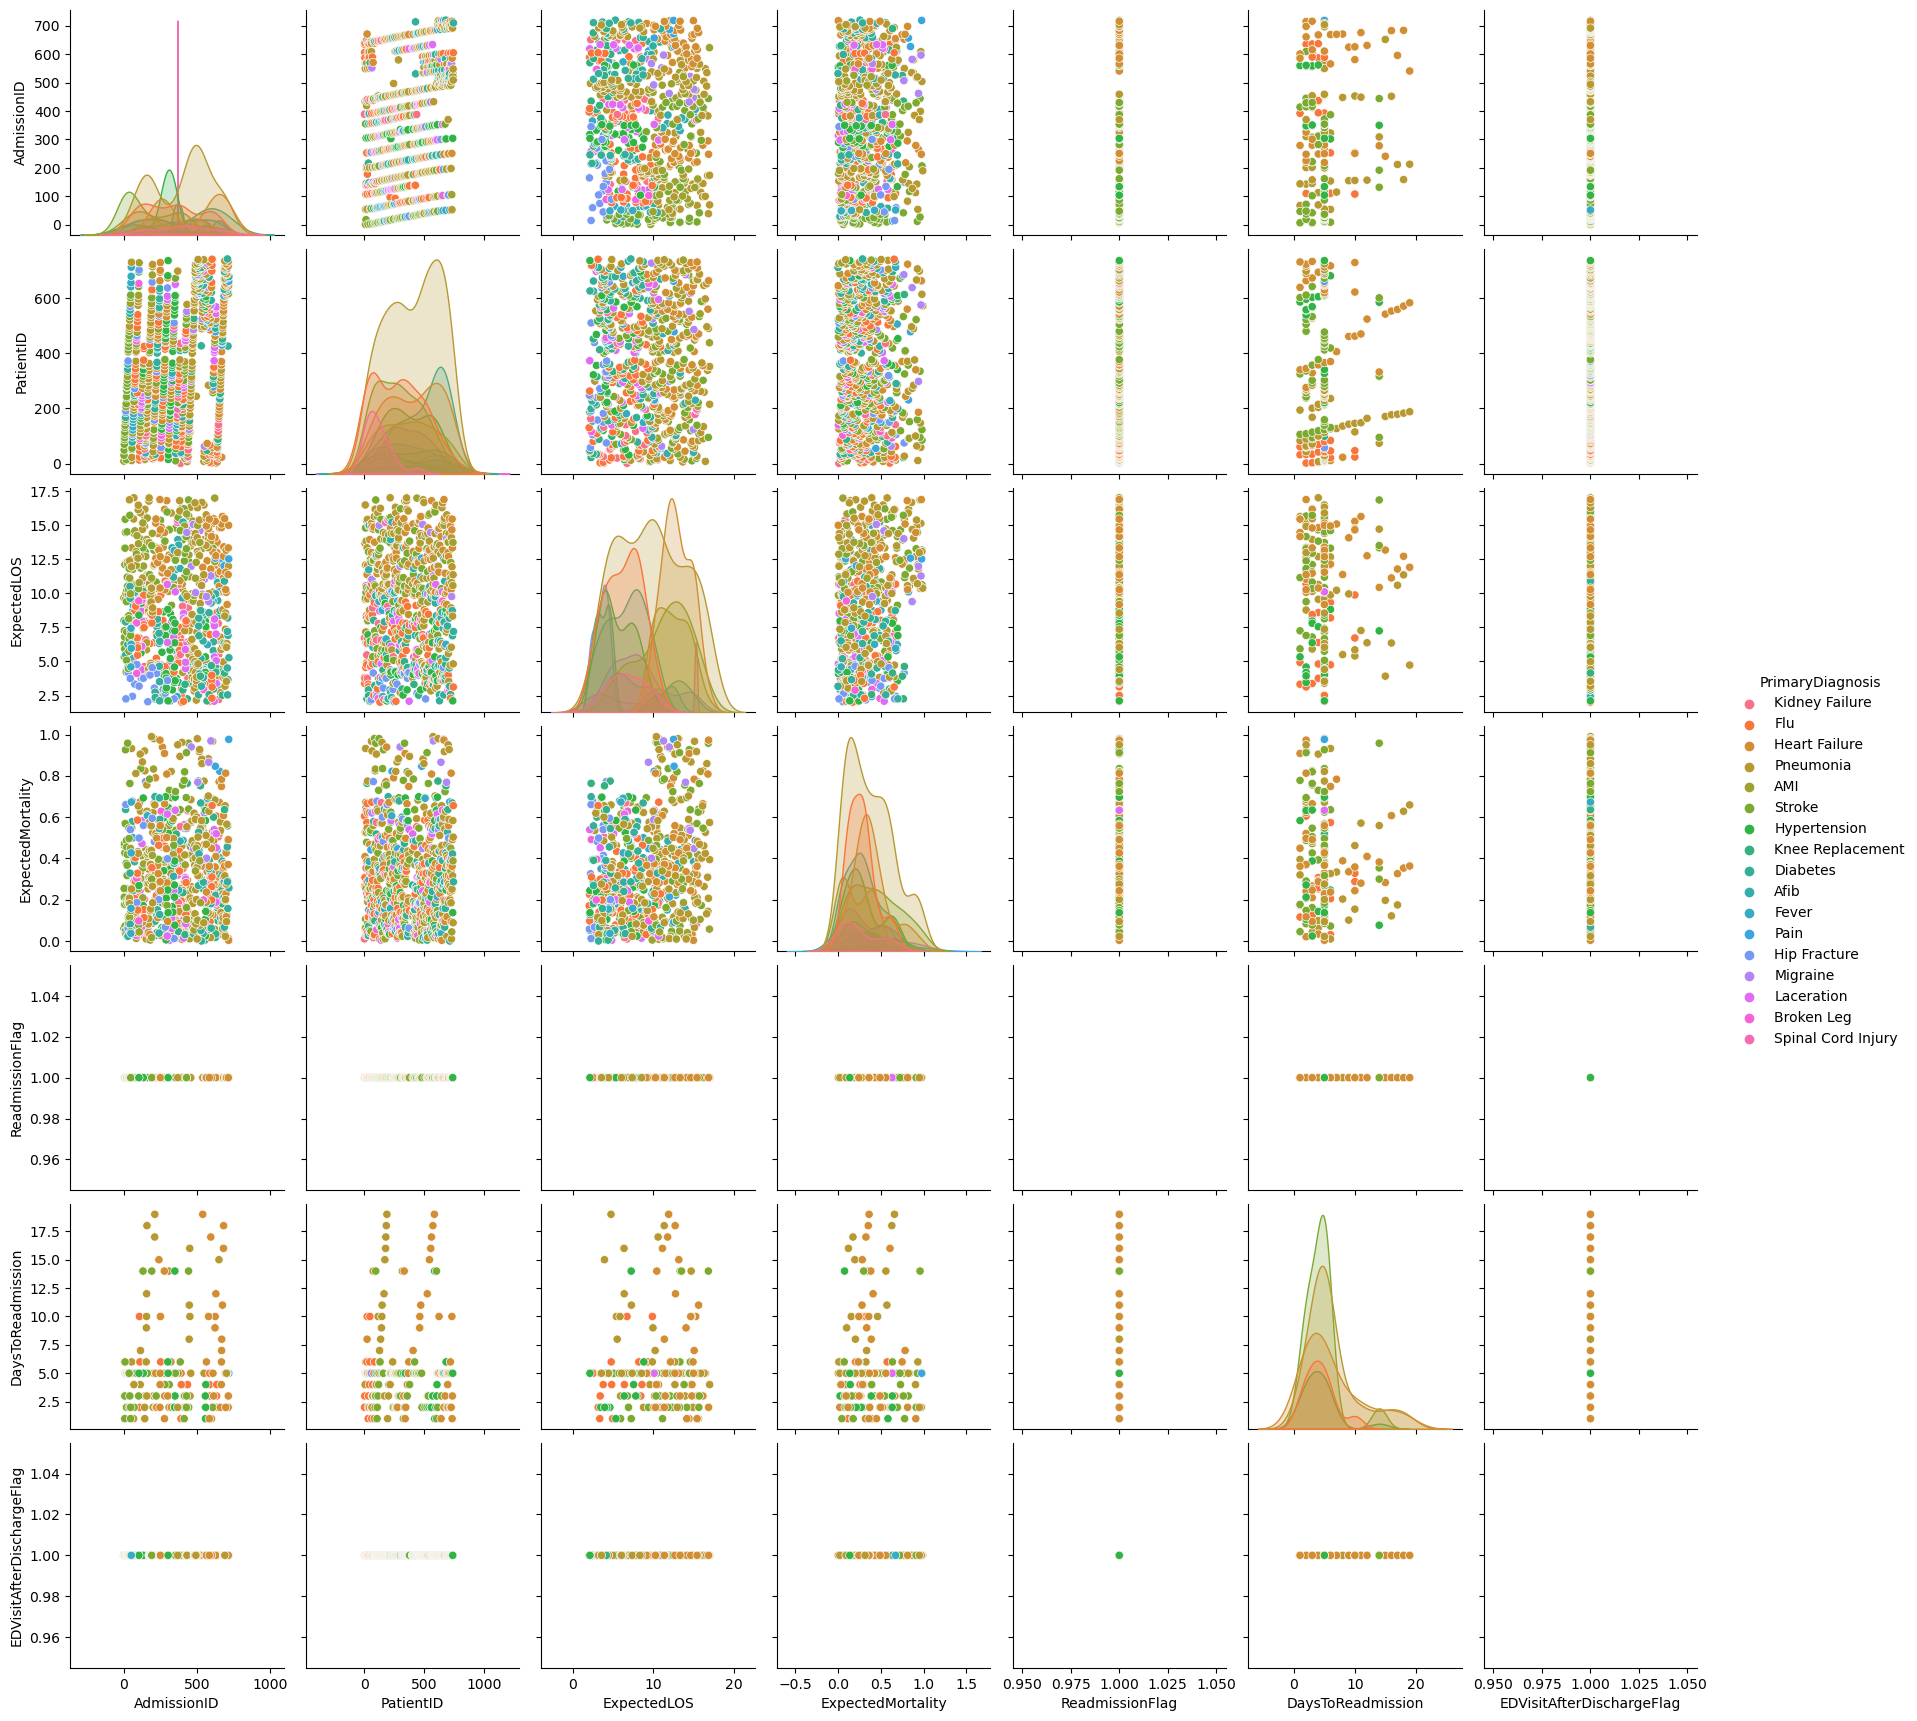

In [36]:
## Q1 - Continued
# Making a pairplot for the Readmission Regitry Table with PrimaryDiagnosis categories in colors

df = pd.read_excel("HospitalDatabase.xlsx","ReAdmissionRegistry")
sns.pairplot(df, hue='PrimaryDiagnosis')

In [23]:
## Q2. Using iloc, retrieve the firstname and lastname of patients between indices 101 and 200.

## Answer

#iloc helps easily retrieve any particular value from a row or column by using index values.
Patients.iloc[101:201,1:3]

,FirstName,LastName
101,Gipsy,Frankton
102,Jethro,Wharin
103,Viv,Aylward
104,Swift,Dreschler
105,Fadel,Jacquemard
...,...,...
196,Noam,Laguerre
197,Arie,Bayless
198,Janaye,O'Mohun
199,Fonz,Group


Text(0.5, 1.0, 'title')

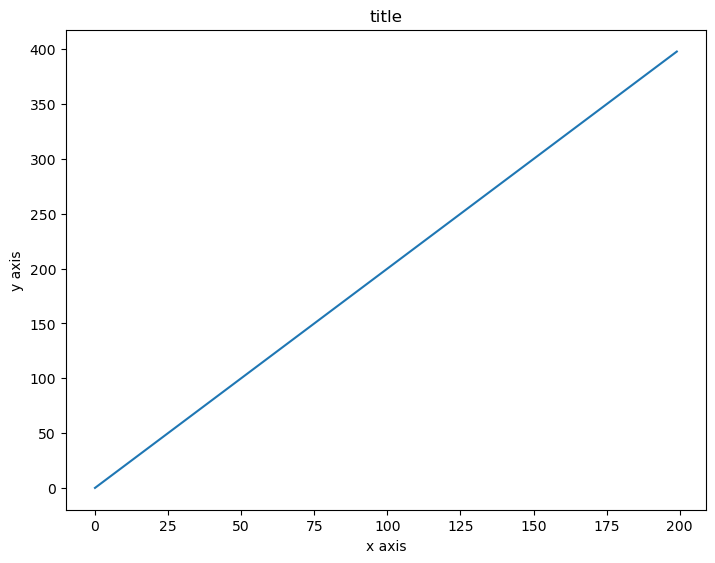

In [94]:
## Q3. Create a figure object called fig using plt.figure() 
## ** Use add_axes to add an axis to the figure canvas at [0,0,1,1]. Call this new axis ax. **
## ** Plot (x,y) on that axes and set the labels.
## Note : You can plot on any x,y set of values."

# Answer:

x = np.arange(0,200)
y = x*2
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(x,y)
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_title('title')

In [124]:
## Q4. Display data by splitting age in 4 quartiles and labeling the quartiles.

#Answer

#Splitting age into four quartiles and displaying the number of patients in each quartile

Patients["Age"] = (pd.to_datetime("today").year-pd.to_datetime(Patients["DateOfBirth"]).dt.year)
df = pd.qcut(Patients['Age'], 4).value_counts()

#Printing the result
print(df.head())    

(43.0, 50.0]      261
(35.999, 43.0]    238
(50.0, 57.0]      226
(57.0, 63.0]      220
Name: Age, dtype: int64


In [126]:
# Q4. Continued

# If the quartiles are labelled, the data shows like this:
Patients["Age"] = (pd.to_datetime("today").year-pd.to_datetime(Patients["DateOfBirth"]).dt.year)
df = pd.qcut(Patients['Age'], 4, labels =["Quartile1","Quartile2", "Quartile3", "Quartile4"]).value_counts()
print(df.head())


Quartile2    261
Quartile1    238
Quartile3    226
Quartile4    220
Name: Age, dtype: int64


In [48]:
## Q5. Display full name of patients who are born in 1986.

## Answer

#Linking the dataframe and using the specific columns to display
df = pd.read_excel("HospitalDatabase.xlsx","Patients",usecols = ["FirstName","LastName","DateOfBirth"])

#Displaying full names of the patients who were born in the year 1986
df['FullName'] = df['FirstName'] + ' ' + df["LastName"]
df["DateOfBirthYear"] = pd.to_datetime(df["DateOfBirth"]).dt.year
df[df["DateOfBirthYear"] == 1986]

,FirstName,LastName,DateOfBirth,FullName,DateOfBirthYear
23,Gabriel,Joseph,1986-05-31 09:36:05.716,Gabriel Joseph,1986
24,Lincoln,Brenda,1986-07-24 17:36:00.791,Lincoln Brenda,1986
29,Ala,Halpert,1986-11-26 10:44:22.628,Ala Halpert,1986
72,Lolita,Darci,1986-01-08 02:34:04.596,Lolita Darci,1986
164,Fadel,Bernardt,1986-05-29 00:35:58.694,Fadel Bernardt,1986
238,Bentley,Kippax,1986-02-11 06:22:40.734,Bentley Kippax,1986
367,Vale,Olanda,1986-04-15 00:49:58.690,Vale Olanda,1986
373,Britt,Dureden,1986-11-19 23:50:47.955,Britt Dureden,1986
386,Cristabel,Chatel,1986-07-10 16:27:30.640,Cristabel Chatel,1986
415,Constantia,Group,1986-03-26 06:37:22.525,Constantia Group,1986


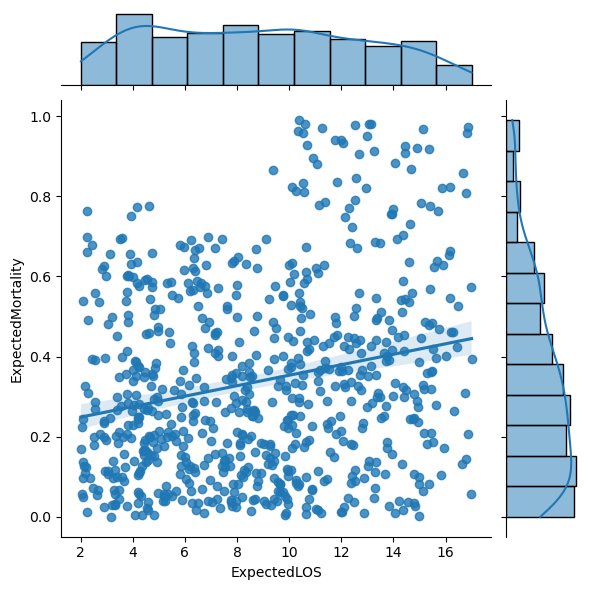

In [130]:
## Q6. Create a jointplot on expected mortality & expected length of stay.

#Answer

# Creating a jointplot for ExpectedMortality and ExpectedLOS
sns.jointplot(x='ExpectedLOS',y='ExpectedMortality',data=ReAdmissionRegistry,kind='reg')


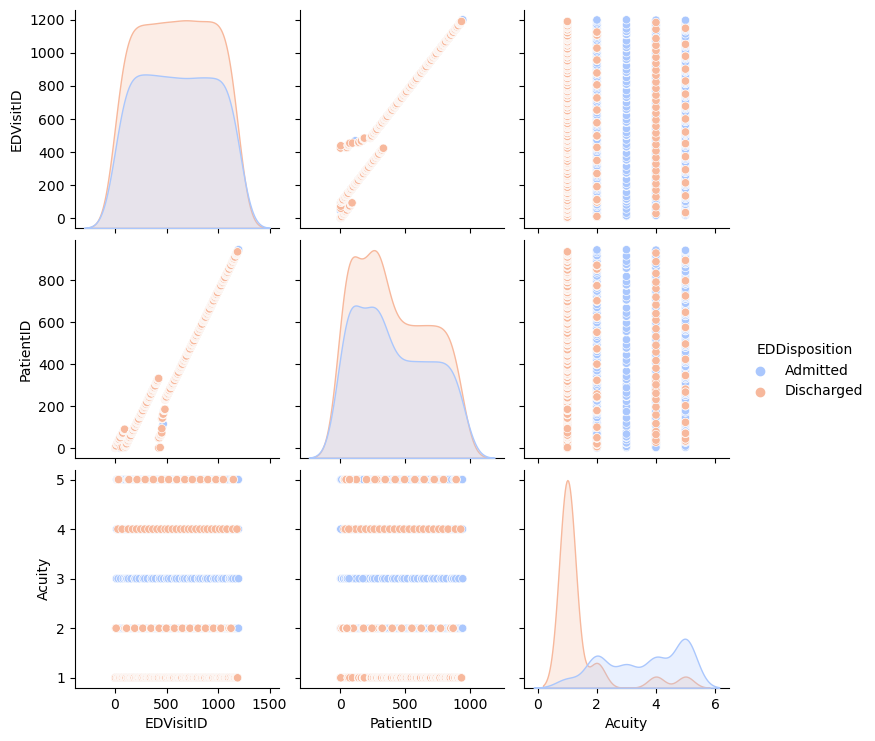

In [39]:
## Q7. Create a pair plot on whole dataframe by taking parameter "hue" as EDDisposition.

## Answer

#Linking the dataframe 
EDVisits = pd.read_excel("HospitalDatabase.xlsx","EDVisits")

#Pairplot of ED Visits with EDDiposition as hue
sns.pairplot(EDVisits,hue='EDDisposition',palette='coolwarm')

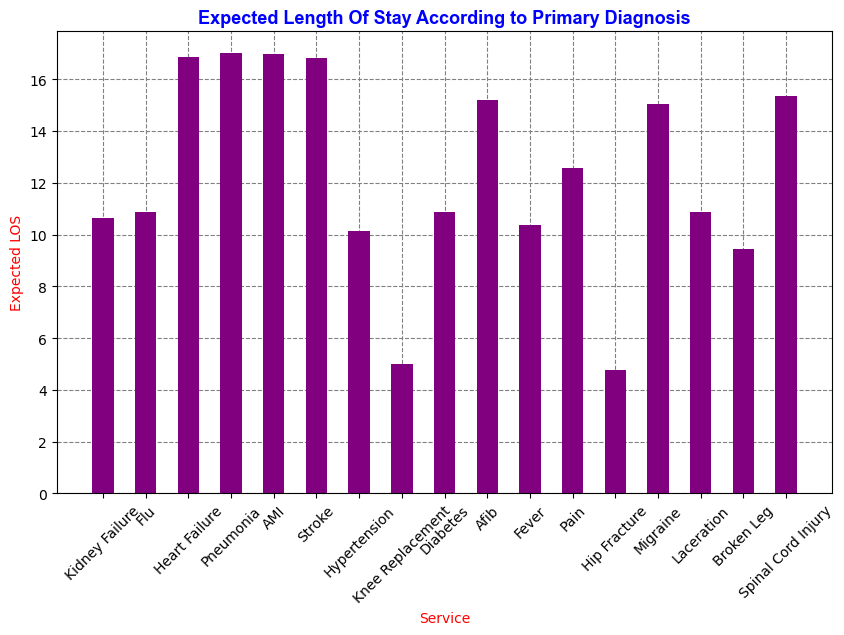

In [40]:
## Q8. Create a bar chart between expectedLOS & Primary diagnosis.

##Answer

#Linking the dataframe
df = pd.read_excel('HospitalDatabase.xlsx', sheet_name = 'ReAdmissionRegistry')

#Creating a bar chart between ExpectedLOS and PrimaryDiagnosis with details
x=df['PrimaryDiagnosis']
y=df['ExpectedLOS']
plt.figure(figsize=(10,6))
plt.rc('axes', axisbelow=True)
plt.grid(color='gray', linestyle='dashed')
plt.bar(x, y, color = 'purple', width = 0.5)
plt.title('Expected Length Of Stay According to Primary Diagnosis', fontsize=13,fontname = 'Arial', fontweight='bold', color='blue')
plt.xticks(rotation=45)
plt.xlabel('Service', color='red')
plt.ylabel('Expected LOS',color='red')

#Displaying the graph
plt.show()


In [17]:
## Q9. Get the list of patient ID's which are not there in ReAdmissionRegistry.

## Answer

#Performing left join on 2 dataframes, Patients and ReAdmissionRegistry
Merged1= pd.merge(Patients, ReAdmissionRegistry, on="PatientID", how="left")

#Removing the NaN values from the joined dataframe. NaN stands for Not A Number and 
#is one of the common ways to represent the missing value in the data
nan_values=Merged1[Merged1["AdmissionID"].isna()]

# Printing the list of the patient ID's which are not there in ReAdmissionRegistry
print(nan_values["PatientID"].tolist())

[4, 135, 145, 189, 200, 224, 234, 374, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 414, 501, 562, 599, 690, 691, 704, 726, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 9

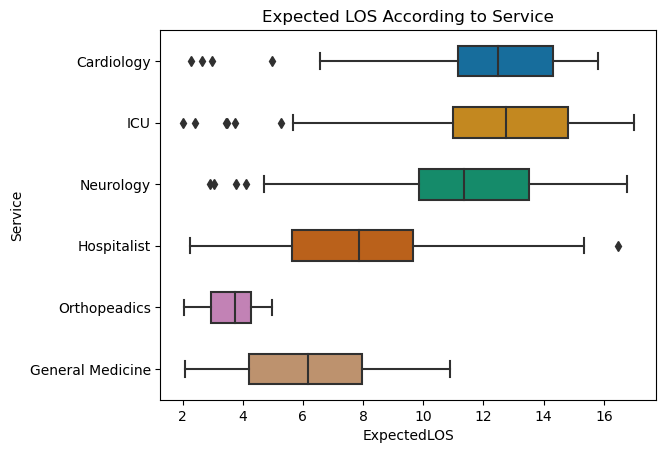

In [41]:
## Q10. Create a boxplot on ExpectedLOS by taking service into account.

## Answer

# Creating a boxplot and adding details
sns.boxplot(y='Service', x='ExpectedLOS', 
                 data=Discharges,
                 width=0.5,
                 palette="colorblind")
plt.title("Expected LOS According to Service")
plt.xlabel("ExpectedLOS")
plt.ylabel("Service")

#Displaying the boxplot
plt.show()